In [37]:
import requests
import pandas as pd
import json

import warnings
warnings.filterwarnings('ignore')

In [3]:
datatset_id = "anonymized-crime-data"
limit = -1
offset = 0

url = "https://cityofsalinas.opendatasoft.com/api/v2/catalog/datasets/{dataset_id}/exports/json?limit={limit}&offset={offset}&timezone=UTC".format(dataset_id=datatset_id, limit=limit, offset=offset)
resp = requests.get(url)

In [4]:
resp_string = resp.content.decode("utf-8")
crime_df = pd.json_normalize(json.loads(resp_string ))

In [36]:
print(crime_df.shape)
crime_df.head()

,objectid,reportid,occdate_on,occdate_th,address100,dow,code,class,crime,primary,...,arrest,suspectage,victages,category,gang_related_incident,geo_shape.type,geo_shape.geometry.coordinates,geo_shape.geometry.type,geo_point_2d.lon,geo_point_2d.lat
0,5,18-031016,2018-03-20T01:00:00+00:00,None,Kipling St / Shelley Way,TUE,11364(a),PT,Possession Of Paraphernalia,11364,...,Y,52,None,Drug,N,Feature,"[-121.67254491145371, 36.65784754420223]",Point,-121.672545,36.657848
1,7,18-031139,2018-03-21T01:00:00+00:00,None,Broadway Dr / Lafayette Way,WED,11364(a),PT,Possession Of Paraphernalia,11364,...,Y,42,None,Drug,N,Feature,"[-121.64753260793644, 36.71360821613068]",Point,-121.647533,36.713608
2,8,18-031301,2018-03-24T01:00:00+00:00,None,N Madeira Ave / N Sanborn Rd,SAT,11364(a),PT,Possession Of Paraphernalia,11364,...,Y,26,None,Drug,N,Feature,"[-121.62218735421423, 36.68223353687473]",Point,-121.622187,36.682234
3,12,18-040189,2018-04-04T02:00:00+00:00,None,E Alisal St / N Sanborn Rd,WED,11364(a),PT,Possession Of Paraphernalia,11364,...,Y,36,None,Drug,N,Feature,"[-121.62745188216657, 36.67292195307567]",Point,-121.627452,36.672922
4,13,18-040208,2018-04-04T02:00:00+00:00,None,Bridge St / E Menke St,WED,11350(a),PT,Possess Narcotic Controlled Substnc,11350,...,Y,56,None,Drug,N,Feature,"[-121.65252010873806, 36.68189182871955]",Point,-121.652520,36.681892


In [38]:
year, month, day = crime_df['occdate_on'].str.split('T').str[0].str.split('-').str

crime_df['year'] = pd.Series(year).astype(int)
crime_df['month'] = pd.Series(month).astype(int)
crime_df['day'] = pd.Series(day).astype(int)

<AxesSubplot:>

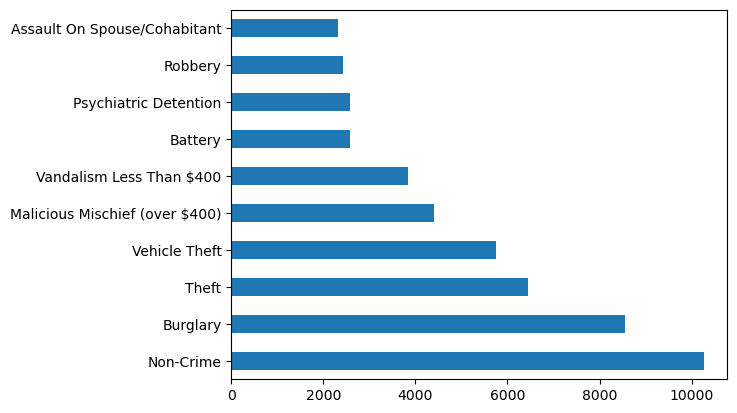

In [16]:
crime_df['crime'].value_counts()[:10].sort_values(ascending=False).plot(kind='barh')

In [ ]:
cols = [
    'crime',
    'year',
    'month',
    'day',
]

In [40]:
crime_df.to_csv('./seeds/crime_data.csv', index=False)

Deliverable
1. Top 10 types of incident filterable by year